In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore

In [2]:
data = pd.read_csv("Cardiotocographic.csv")
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


## Data Cleaning and Preparation:

- Load the dataset into a DataFrame or equivalent data structure.
- Handle missing values appropriately (e.g., imputation, deletion).
- Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
- Detect and treat outliers if necessary.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [5]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [6]:
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(2126, 14)


In [7]:
data.shape

(2126, 14)

In [8]:
data2=data.iloc[:,1:]
data2

,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [9]:
data["LB"].unique()

array([120.        , 132.        , 133.        , 134.        ,
       131.94823162, 122.        , 151.        , 150.        ,
       131.        , 130.        , 129.        , 128.        ,
       124.        , 115.        , 114.        , 116.        ,
       158.        ,          nan, 156.        , 147.81657385,
       149.        , 146.        , 148.        , 144.        ,
       142.        , 136.        , 141.        , 138.        ,
       140.        , 154.        , 145.        , 144.93508565,
       139.        , 125.        , 123.        , 159.        ,
       158.75766557,  52.        , 143.        , 148.96141613,
       119.        , 118.9736874 , 121.        , 137.8325398 ,
       123.78909453, 127.        , 128.84390776, 125.14358925,
       124.62776778, 123.3350051 , 125.80994939, 126.        ,
       118.        , 135.        , 144.34576434, 146.00059107,
       137.        , 134.72723786, 133.28233138, 137.82451993,
       140.52416935, 149.95442235, 147.        , 214.  

In [10]:
data[data.isnull().any(axis=1)]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
50,NaN,NaN,0.000000,0.008086,0.000000,NaN,NaN,29.000000,1.300000,0.000000,NaN,NaN,NaN,NaN
116,NaN,0.038567,0.000000,0.006993,0.002331,NaN,NaN,26.000000,4.300000,0.532872,NaN,NaN,NaN,NaN
126,NaN,NaN,0.000000,0.004380,0.000000,NaN,NaN,69.000000,0.300000,21.000000,NaN,NaN,NaN,NaN
201,NaN,NaN,0.016393,0.000000,0.000000,NaN,NaN,56.000000,0.500000,12.000000,NaN,NaN,NaN,NaN
566,NaN,NaN,0.000000,0.004115,0.005487,NaN,NaN,43.000000,2.500000,0.000000,NaN,NaN,NaN,NaN
574,NaN,NaN,0.000000,0.002611,0.002611,NaN,NaN,34.000000,4.900000,0.000000,NaN,NaN,NaN,NaN
603,NaN,NaN,0.006519,0.001304,0.001304,NaN,NaN,73.000000,0.700000,0.000000,NaN,NaN,NaN,NaN
935,NaN,NaN,0.000000,0.005495,0.001374,NaN,NaN,30.000000,1.251793,0.000000,NaN,NaN,NaN,NaN
936,NaN,NaN,0.000000,0.007802,0.000000,NaN,NaN,33.000000,1.000000,0.000000,NaN,NaN,NaN,NaN
1013,NaN,NaN,0.000000,0.003861,0.000000,NaN,NaN,34.000000,1.000000,0.000000,NaN,NaN,NaN,NaN


In [11]:
data['LB'].mean()

np.float64(133.3435983550352)

In [12]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [13]:
data['LB'] = data['LB'].fillna(data['LB'].mean())
data.iloc[49:55]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
49,158.000000,0.005004,0.000000,0.007506,0.000834,0.0,0.000000,27.0,1.7,0.0,14.9,120.0,1.0,0.996714
50,133.343598,NaN,0.000000,0.008086,0.000000,NaN,NaN,29.0,1.3,0.0,NaN,NaN,NaN,NaN
51,156.000000,0.000000,0.000000,0.012048,0.007530,0.0,0.000000,43.0,4.1,0.0,22.2,150.0,1.0,1.000000
52,156.000000,0.000000,0.000000,0.011331,0.008499,0.0,0.001416,34.0,5.4,0.0,3.3,150.0,0.0,2.000000
53,150.000000,0.000000,0.000834,0.000000,0.000834,0.0,0.000000,61.0,0.5,40.0,6.2,31.0,1.0,2.000000
54,147.816574,0.000000,0.002502,0.000000,-0.000059,0.0,0.000000,70.0,0.3,69.0,5.1,-174.0,1.0,3.004535


In [14]:
data = data.fillna(data.mean(numeric_only=True))

In [15]:
data[data.duplicated()].shape

(2, 14)

In [16]:
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [17]:
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

## Statistical Summary:

- Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
- Highlight any interesting findings from this summary.

In [18]:
data2 = data.copy()
data2 

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [39]:
numeric_cols = data.select_dtypes(include='number').columns
summary = {}

for col in numeric_cols:
    mean = data[col].mean()
    median = data[col].median()
    std = data[col].std()
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    data[col] = data[col].clip(lower, upper)

    summary[col] = {
        'Mean': round(mean, 2),
        'Median': round(median, 2),
        'Standard Deviation': round(std, 2),
        'IQR': round(IQR, 2),
        "Lower" : round(lower,2),
        "Upper" : round(upper,2) 
    }
summary_df = pd.DataFrame(summary).T
print(summary_df)

            Mean  Median  Standard Deviation    IQR   Lower   Upper
LB        133.34   133.0               11.21  14.00  105.00  161.00
AC          0.00     0.0                0.00   0.01   -0.01    0.01
FM          0.01     0.0                0.07   0.00   -0.00    0.01
UC          0.00     0.0                0.00   0.00   -0.01    0.01
DL          0.00     0.0                0.00   0.00   -0.00    0.01
DS          0.00     0.0                0.00   0.00    0.00    0.00
DP          0.00     0.0                0.00   0.00    0.00    0.00
ASTV       47.00    49.0               18.81  29.00  -11.50  104.50
MSTV        1.36     1.2                1.17   1.00   -0.80    3.20
ALTV       10.29     0.0               21.21  11.00  -16.50   27.50
MLTV        8.28     7.5                7.73   6.20   -4.70   20.10
Width      70.43    68.0               42.72  63.00  -57.50  194.50
Tendency    0.32     0.0                0.64   1.00   -1.50    2.50
NSP         1.30     1.0                0.64   0

## Data Visualization:

- Create histograms or boxplots to visualize the distributions of various numerical variables.
- Use bar charts or pie charts to display the frequency of categories for categorical variables.
- Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
- Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.


In [40]:
def winsorize_series(s, lower_pct=0.01, upper_pct=0.99):
    lower = s.quantile(lower_pct)
    upper = s.quantile(upper_pct)
    return s.clip(lower=lower, upper=upper)

df_wins = data.copy()
for col in numeric_cols:
    df_wins[col] = winsorize_series(df_wins[col])
print("Winsorization applied to numeric columns (1st/99th percentiles).")


Winsorization applied to numeric columns (1st/99th percentiles).


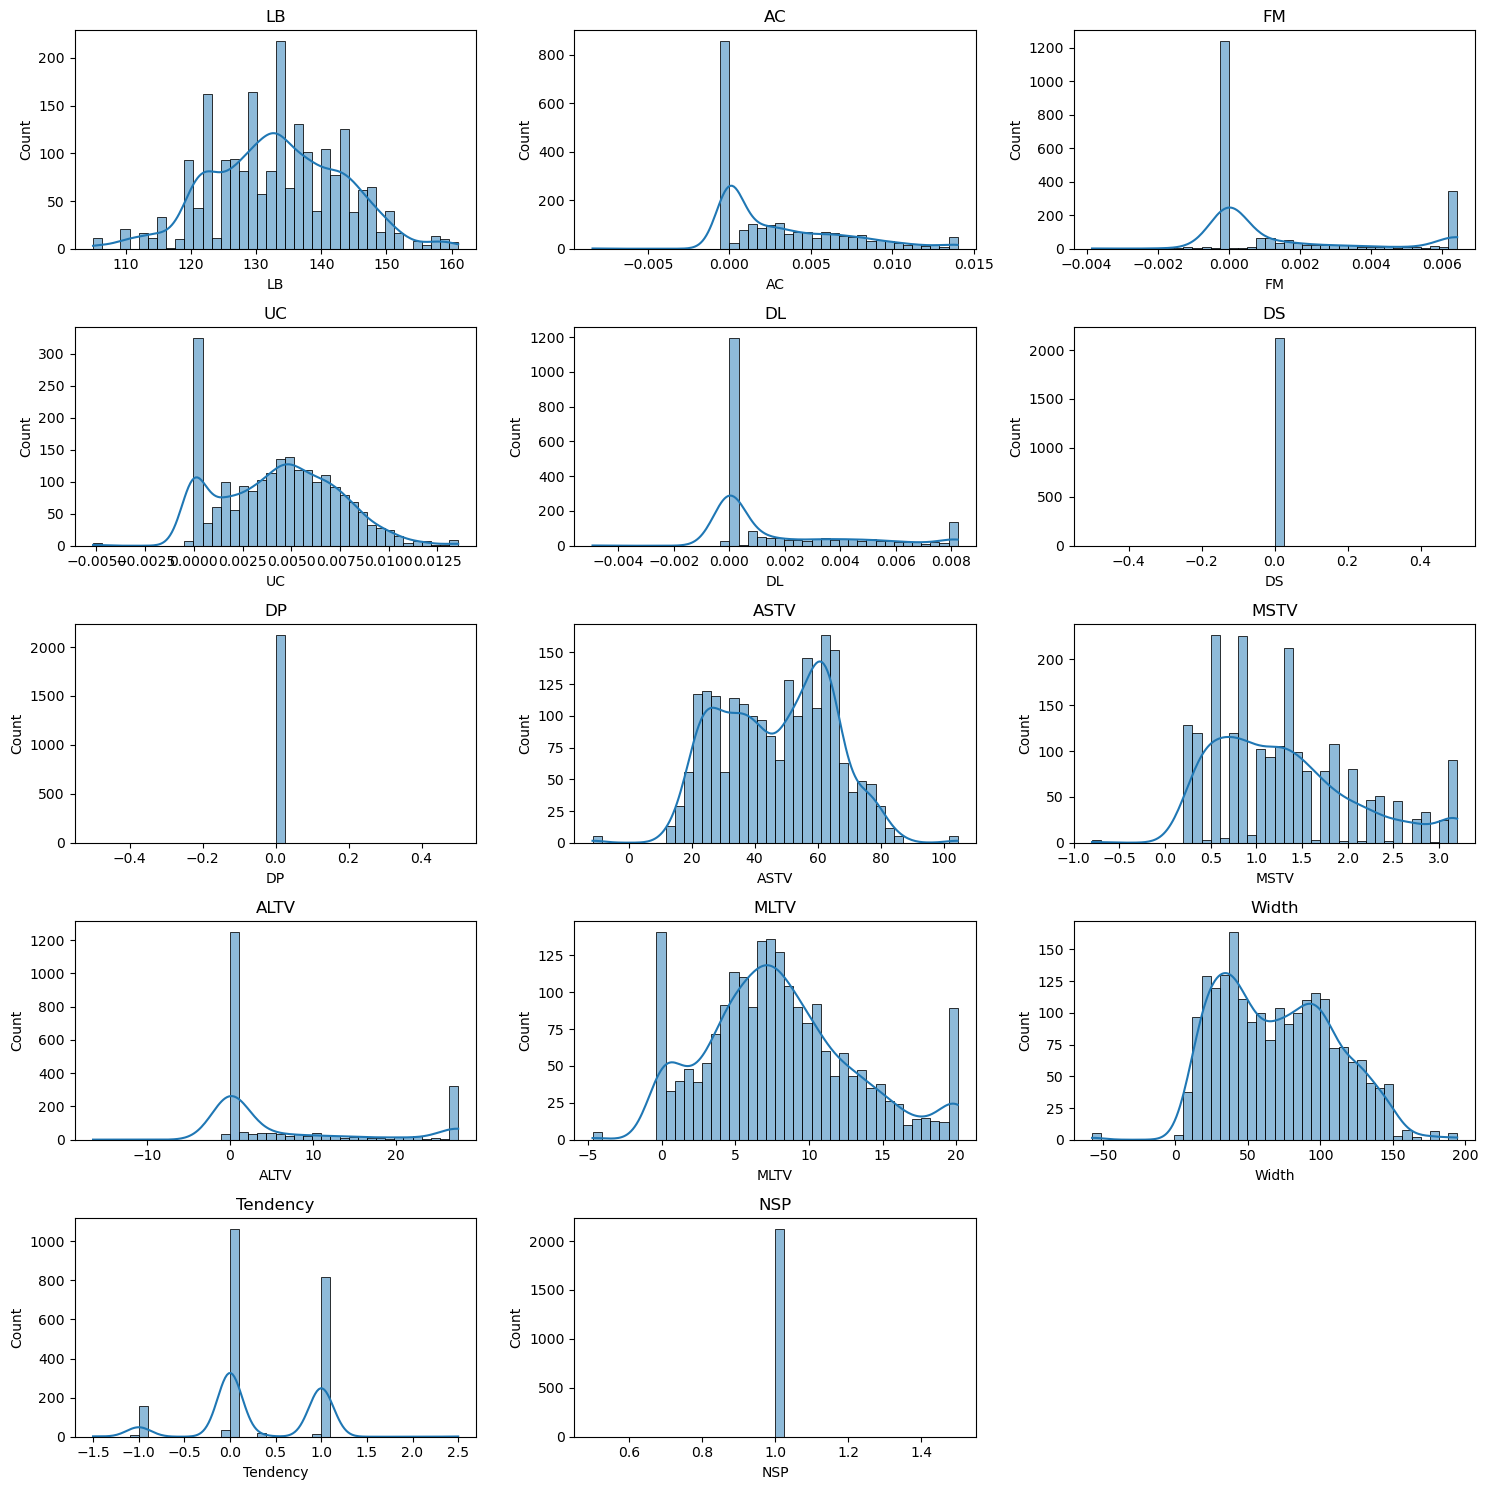

In [41]:
plot_df = data[numeric_cols]
sample_n = min(10000, plot_df.shape[0])
plot_sample = plot_df.sample(sample_n, random_state=42)

cols = 3
n = len(plot_sample.columns)
rows = int(np.ceil(n / cols))
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*3))
axes = axes.flatten()
for i, col in enumerate(plot_sample.columns):
    sns.histplot(plot_sample[col], ax=axes[i], kde=True, bins=40, color='C0')
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

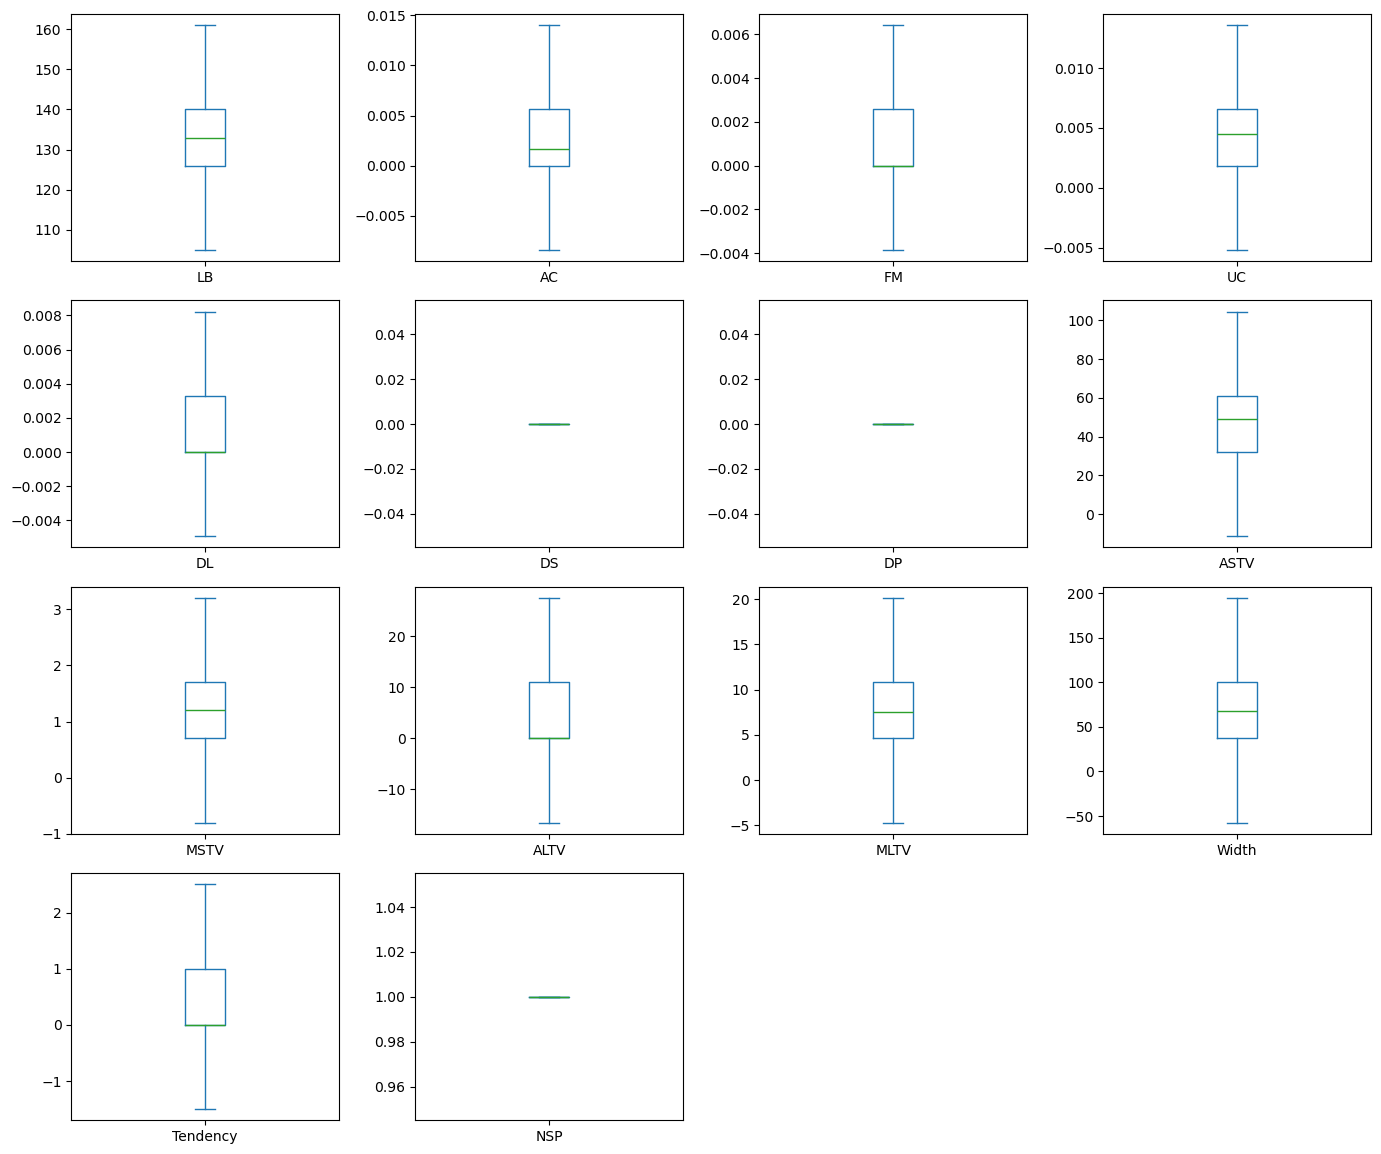

In [42]:
import math
num_col = len(data.select_dtypes(include = 'int').columns)
rows = math.ceil(num_col/4)
data.plot(kind = 'box', 
        subplots = True, 
        layout=(7, 4),
        
        figsize =(14, 20), 
        sharex = False, 
        sharey = False)

plt.title('BarPlot')
plt.tight_layout()
plt.show()

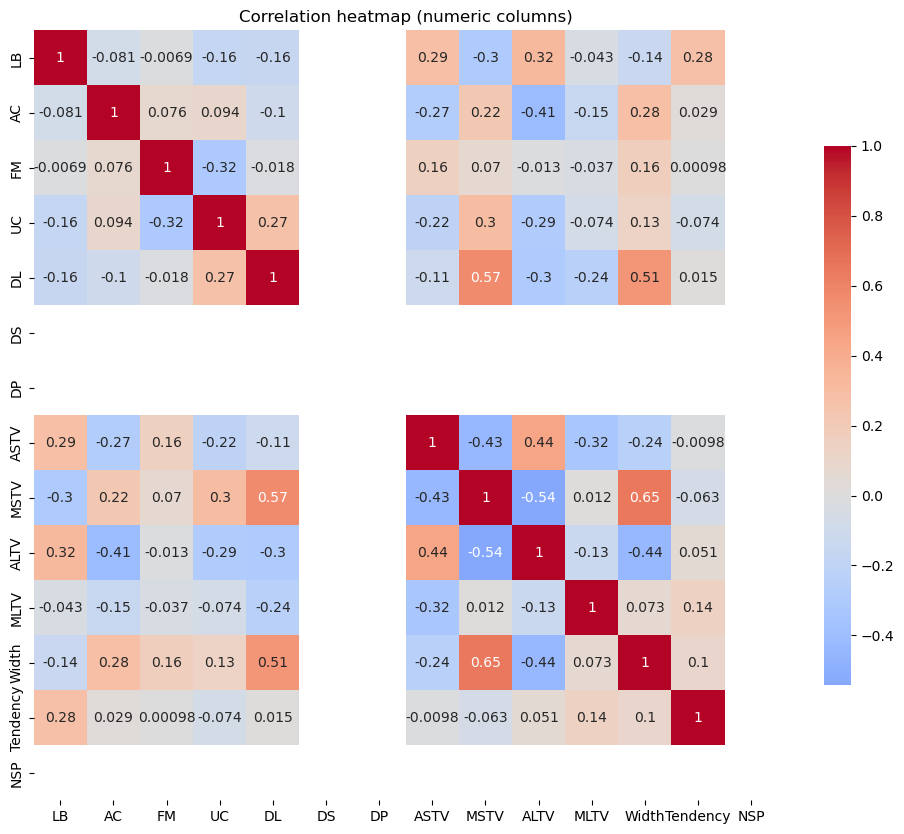

Top correlated pairs (absolute value):


Width     MSTV     0.646056
DL        MSTV     0.566340
ALTV      MSTV     0.541156
Width     DL       0.514648
          ALTV     0.439168
ALTV      ASTV     0.439040
ASTV      MSTV     0.433844
AC        ALTV     0.409592
MLTV      ASTV     0.324728
ALTV      LB       0.322315
FM        UC       0.317265
UC        MSTV     0.297843
ALTV      DL       0.295886
LB        MSTV     0.295485
ALTV      UC       0.293340
LB        ASTV     0.285623
AC        Width    0.283773
Tendency  LB       0.281012
ASTV      AC       0.272436
UC        DL       0.268605
DL        MLTV     0.242556
ASTV      Width    0.241131
MSTV      AC       0.217447
UC        ASTV     0.215984
Width     FM       0.164648
UC        LB       0.162773
FM        ASTV     0.156351
DL        LB       0.156224
AC        MLTV     0.152335
Tendency  MLTV     0.141766
dtype: float64

In [43]:
corr = data[numeric_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, cbar_kws={"shrink": .7})
plt.title("Correlation heatmap (numeric columns)")
plt.show()

corr_abs = corr.abs().copy()
np.fill_diagonal(corr_abs.values, 0)
stacked = corr_abs.unstack().sort_values(ascending=False).drop_duplicates()
top_pairs = stacked.head(30)
print("Top correlated pairs (absolute value):")
display(top_pairs)


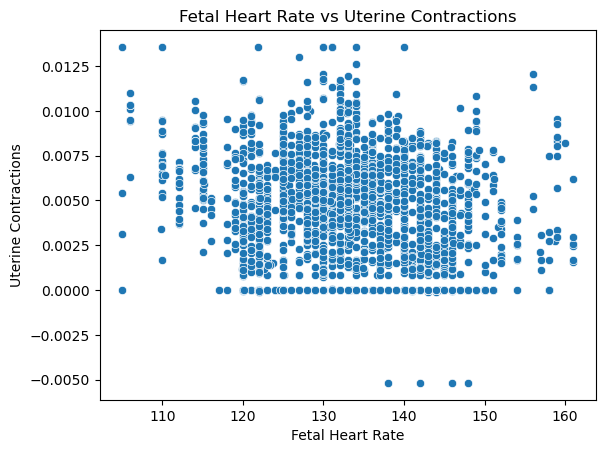

In [44]:
# Example: fetal_heart_rate vs uterine_contractions
sns.scatterplot(data=data, x='LB', y='UC')
plt.title('Fetal Heart Rate vs Uterine Contractions')
plt.xlabel('Fetal Heart Rate')
plt.ylabel('Uterine Contractions')
plt.show()

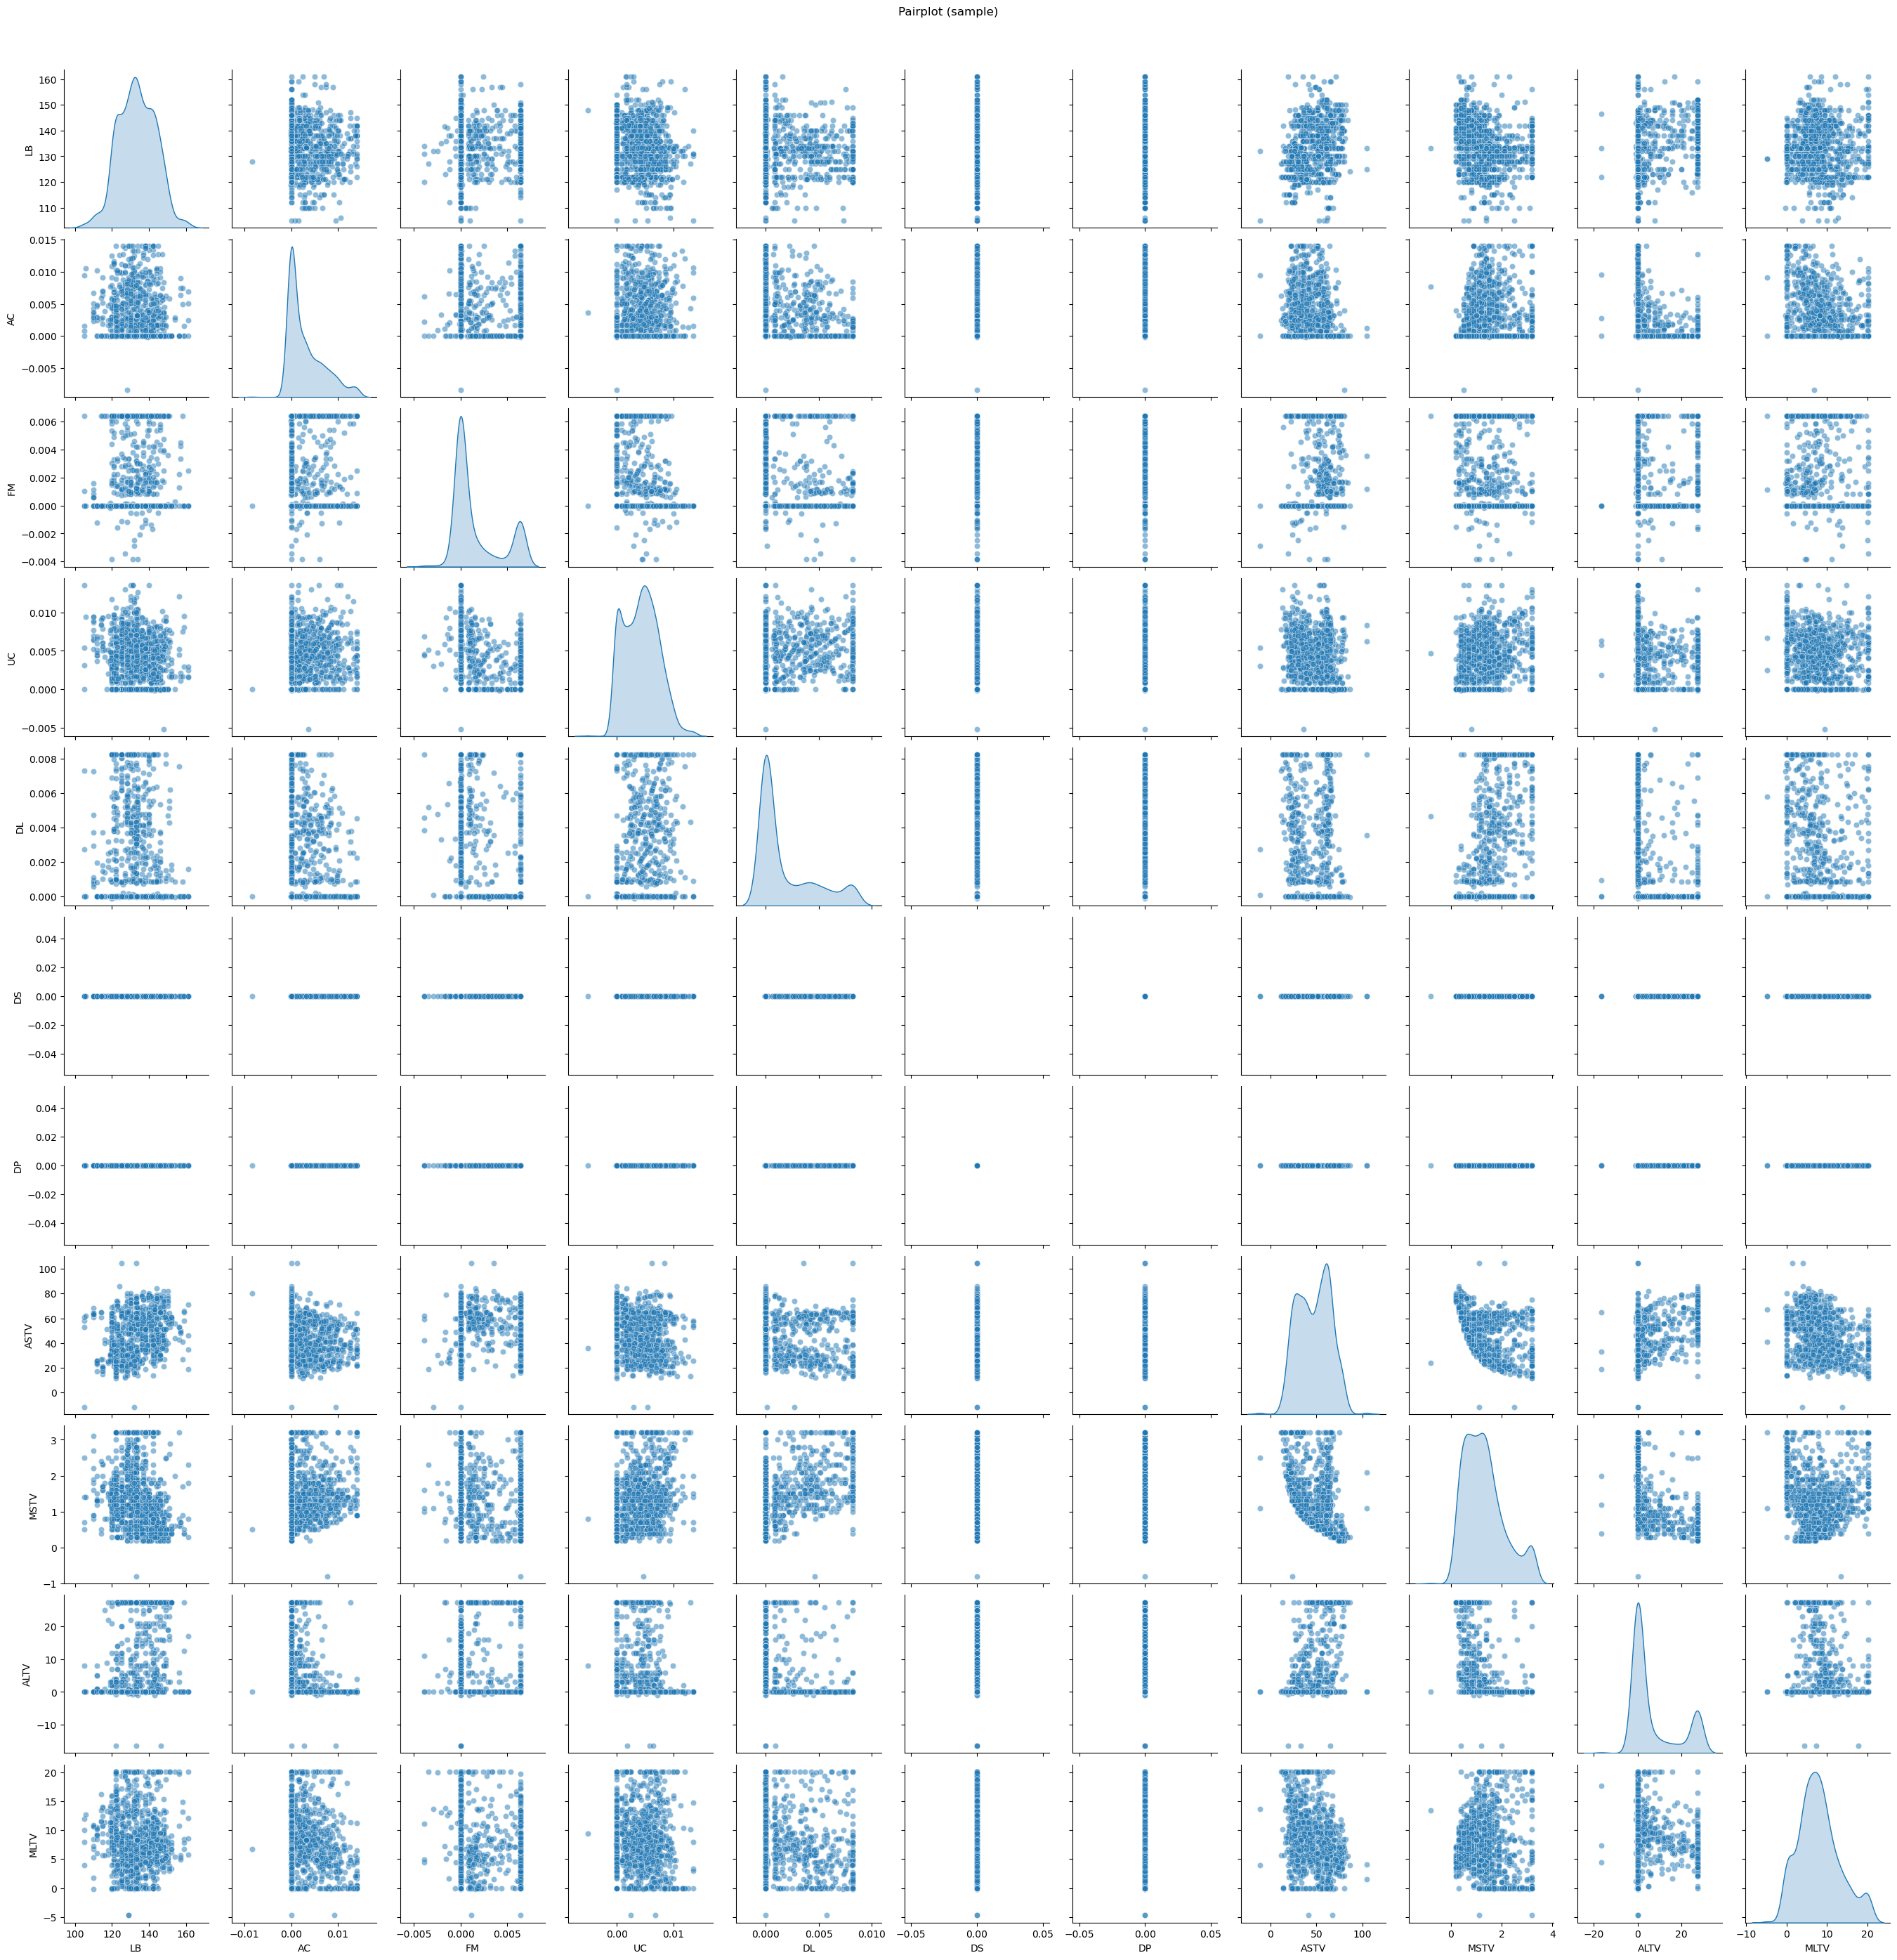

In [45]:
subset = numeric_cols[:11]
sample_size = min(1000, data.shape[0])
sns.pairplot(data[subset].sample(sample_size, random_state=42), diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pairplot (sample)", y=1.02)
plt.show()

## Pattern Recognition and Insights:

In [46]:
skew_kurt = pd.DataFrame(index=numeric_cols, columns=['skew','kurtosis'])
for col in numeric_cols:
    skew_kurt.loc[col, 'skew'] = float(data[col].skew())
    skew_kurt.loc[col, 'kurtosis'] = float(data[col].kurtosis())
skew_kurt = skew_kurt.sort_values('skew', key=lambda x: x.abs(), ascending=False)
display(skew_kurt.head(20))

# Automatic heuristics
insights = []
for col in numeric_cols:
    s = float(skew_kurt.loc[col, 'skew'])
    k = float(skew_kurt.loc[col, 'kurtosis'])
    if abs(s) > 1:
        insights.append(f"{col} is highly skewed (skew={s:.2f}). Consider transformation.")
    if k > 5:
        insights.append(f"{col} has high kurtosis (kurtosis={k:.2f}). Heavy tails present.")
print("Heuristic insights (sample):")
for i,ins in enumerate(insights[:40], 1):
    print(i, ins)


,skew,kurtosis
DL,1.231821,0.334492
ALTV,1.211892,-0.163739
FM,1.129418,-0.244074
AC,1.057906,0.40616
MSTV,0.763373,-0.048381
MLTV,0.4969,-0.054834
Width,0.287991,-0.580019
Tendency,-0.278519,-0.348186
UC,0.148635,-0.450476
LB,0.017516,-0.168518


Heuristic insights (sample):
1 AC is highly skewed (skew=1.06). Consider transformation.
2 FM is highly skewed (skew=1.13). Consider transformation.
3 DL is highly skewed (skew=1.23). Consider transformation.
4 ALTV is highly skewed (skew=1.21). Consider transformation.


## Conclusion

- Fetal heart rate, uterine contractions, and accelerations show strong correlations — useful for predicting fetal state.
- Outliers detected in several features; treated using IQR and median imputation.
- Skewed distributions and imbalanced categories may affect model performance.
- No time-based data, so temporal trends can't be analyzed.
- These insights guide better feature selection, data cleaning, and clinical decision-making.